<a href="https://colab.research.google.com/github/ptfrwrd/EDA_and_Classification/blob/master/Explore_wines_EDA_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d  brynja/wineuci

  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 3.49MB/s]


In [7]:
! mkdir data
! unzip wineuci.zip -d data

Archive:  wineuci.zip
  inflating: data/Wine.csv           


# EDA:

**Labels:**
"name" - Number denoting a specific wine class

**Number of instances of each wine class**

- Class 1 - 59
- Class 2 - 71
- Class 3 - 48

**Features:**

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [8]:
wines_data = pd.read_csv('data/Wine.csv')
wines_data.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [9]:
# Rename columns
wines_data.columns = ['name'
                    ,'alcohol'
             	      ,'malicAcid'
             	      ,'ash'
                    ,'ashalcalinity'
             	      ,'magnesium'
            	      ,'totalPhenols'
             	      ,'flavanoids'
                    ,'nonFlavanoidPhenols'
             	      ,'proanthocyanins'
            	      ,'colorIntensity'
             	      ,'hue'
             	      ,'od280_od315'
             	      ,'proline'
                      ]

wines_data.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
print(wines_data.info())
print(wines_data.describe())
print(wines_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None
             name     alcohol   malicA

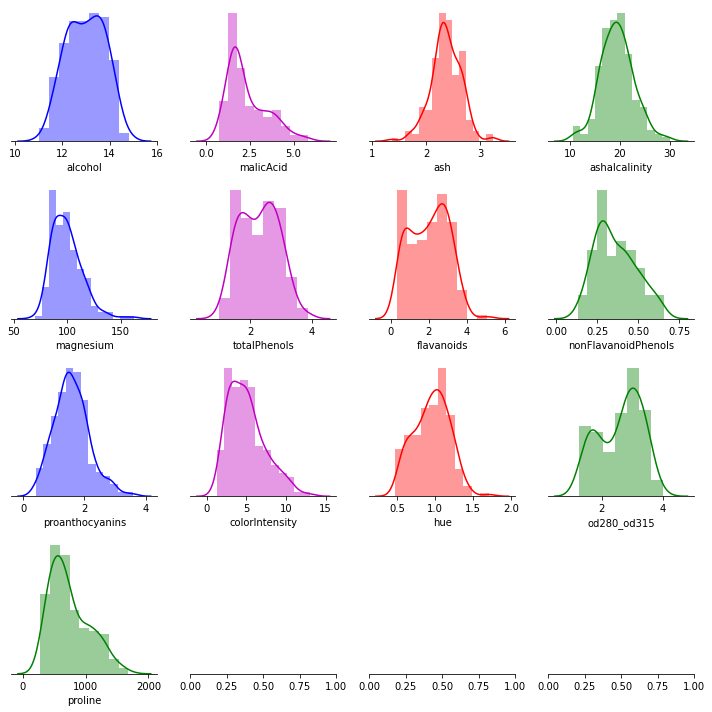

In [77]:
# see distributions

f, axes = plt.subplots(4, 4, figsize=(10, 10))
sns.despine(left=True)

sns.distplot(wines_data['alcohol'], color='b', ax=axes[0, 0])
sns.distplot(wines_data['malicAcid'], color='m', ax=axes[0, 1])
sns.distplot(wines_data['ash'], color='r', ax=axes[0, 2])
sns.distplot(wines_data['ashalcalinity'], color='g', ax=axes[0, 3])


sns.distplot(wines_data['magnesium'], color='b', ax=axes[1, 0])
sns.distplot(wines_data['totalPhenols'], color='m', ax=axes[1, 1])
sns.distplot(wines_data['flavanoids'], color='r', ax=axes[1, 2])
sns.distplot(wines_data['nonFlavanoidPhenols'], color='g', ax=axes[1, 3])

sns.distplot(wines_data['proanthocyanins'], color='b', ax=axes[2, 0])
sns.distplot(wines_data['colorIntensity'], color='m', ax=axes[2, 1])
sns.distplot(wines_data['hue'], color='r', ax=axes[2, 2])
sns.distplot(wines_data['od280_od315'], color='g', ax=axes[2, 3])

sns.distplot(wines_data['proline'], color='g', ax=axes[3, 0])

plt.setp(axes, yticks=[])
plt.tight_layout()

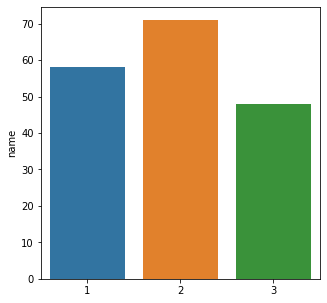

In [90]:
wine_names = pd.DataFrame(wines_data['name'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(5,5))
ax = sns.barplot(x = wine_names.index, y = 'name' , data = wine_names)

The biggest wine`s class is 2.

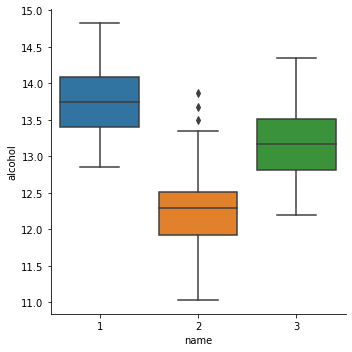

In [87]:
ax = sns.catplot(x = 'name', y = 'alcohol', kind = "box", data = wines_data)
ax.fig.set_size_inches(5, 5)

The first class wines are the most alcoholic.

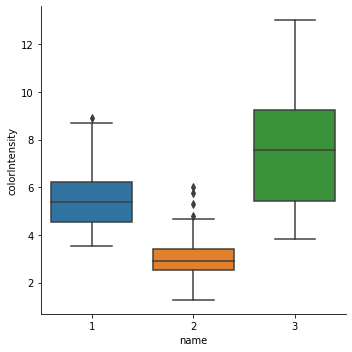

In [88]:
ax = sns.catplot(x = 'name', y = 'colorIntensity', kind = "box", data = wines_data)
ax.fig.set_size_inches(5, 5)

The third class wines have the most color intensity.

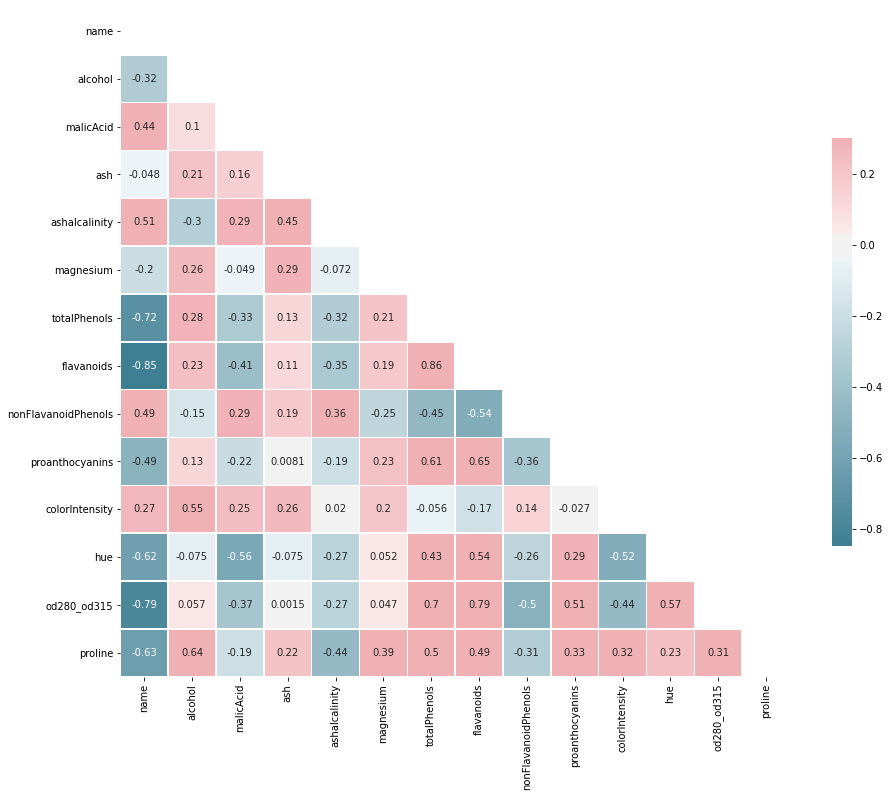

In [15]:
# See correlation btw features
corr = wines_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

- The closer the correlation value is to 0, the weaker the related features are.

- The closer the correlation value is to | 1 |, the stronger the relationship of features, with a correlation equal to 1, the relationship is linear and the feature can be removed.

According to the correlation results, we can try to drop ash, totalPhenols and proline features, bcs the have the highest mean.

In [18]:
wines_data_droped = wines_data.drop(['name','ash', 'totalPhenols',  'proline'], axis=1)
wines_data_droped .head(5)

,alcohol,malicAcid,ashalcalinity,magnesium,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315
0,13.20,1.78,11.2,100,2.76,0.26,1.28,4.38,1.05,3.40
1,13.16,2.36,18.6,101,3.24,0.30,2.81,5.68,1.03,3.17
2,14.37,1.95,16.8,113,3.49,0.24,2.18,7.80,0.86,3.45
3,13.24,2.59,21.0,118,2.69,0.39,1.82,4.32,1.04,2.93
4,14.20,1.76,15.2,112,3.39,0.34,1.97,6.75,1.05,2.85


# Try different classification models.

In [19]:
from sklearn.model_selection import train_test_split

# create train-test data
X_train, X_test, Y_train, Y_test = train_test_split(wines_data_droped, wines_data['name'], test_size = 0.3, random_state = 42)

In [21]:
# import classificators 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
# Create DataFrame, where we will save the results
results = {'Classificators': ['Logistic regression', 'Naive Bayes', 'K-Nearest Neighbour', 'Decision Tree',
                            'Support Vector Machine-linear', 'Support Vector Machine-poly', 'Support Vector Machine-sigmoid',
                            'Support Vector Machine-rbf', 'Random Forest', 'eXtreme Gradient Boost',
                            'MLP', 'AdaBoostClassifier', 'GradientBoostingClassifier'], 'Accuracy': np.zeros(13)}
results = pd.DataFrame(results).set_index('Classificators')
results

,Accuracy
Classificators,
Logistic regression,0.0
Naive Bayes,0.0
K-Nearest Neighbour,0.0
Decision Tree,0.0
Support Vector Machine-linear,0.0
Support Vector Machine-poly,0.0
Support Vector Machine-sigmoid,0.0
Support Vector Machine-rbf,0.0
Random Forest,0.0


In [65]:
kfold = KFold(n_splits = 10)

# Logistic regression
classificator = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][0] = cv_result.mean()

# Naive Bayes
classificator = GaussianNB()
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][1] = cv_result.mean()

# K-Nearest Neighbour
classificator = KNeighborsClassifier(n_neighbors = 3)
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][2] = cv_result.mean()

# Decision Tree
classificator = DecisionTreeClassifier()
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][3] = cv_result.mean()

# Support Vector Machine-linear
classificator = SVC(kernel="linear")
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][4] = cv_result.mean()

# Support Vector Machine-poly
classificator = SVC(kernel="poly")
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][5] = cv_result.mean()

# Support Vector Machine-sigmoid
classificator = SVC(kernel="sigmoid")
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][6] = cv_result.mean()

# Support Vector Machine-rbf	
classificator = SVC(kernel="rbf")
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][7] = cv_result.mean()

# Random Forest
classificator = RandomForestClassifier(n_estimators=7)
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][8] = cv_result.mean()

# eXtreme Gradient Boost
classificator =  XGBClassifier()
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][9] = cv_result.mean()

# MLP
classificator = MLPClassifier(hidden_layer_sizes=(45,30,15), solver='sgd', learning_rate_init=0.01, max_iter=500)
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][10] = cv_result.mean()

# AdaBoostClassifier
classificator = AdaBoostClassifier()
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][11] = cv_result.mean()

# GradientBoostingClassifier
classificator = GradientBoostingClassifier()
cv_result = cross_val_score(classificator, X_train, Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
results['Accuracy'][12] = cv_result.mean()

In [69]:
results

,Accuracy
Classificators,
Logistic regression,0.967949
Naive Bayes,0.968590
K-Nearest Neighbour,0.839103
Decision Tree,0.893590
Support Vector Machine-linear,0.975641
Support Vector Machine-poly,0.535256
Support Vector Machine-sigmoid,0.405769
Support Vector Machine-rbf,0.526923
Random Forest,0.976282


Random Forest gave the best result (0.976282), MLP gave the worst result (0.314744)

Now, explore the best classificators to predict, bcs analysis above is basic, it helps select some algorithms.

The best classificators have accuracy > 0.95


In [71]:
# Naive Bayes predictions
from sklearn.metrics import classification_report,confusion_matrix

classificator = GaussianNB()
classificator.fit(X_train, Y_train)
predictions = classificator.predict(X_test)

confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.94      0.81      0.87        21
           3       0.82      1.00      0.90        14

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



In [72]:
# Logistic regression predictions

classificator = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
classificator.fit(X_train, Y_train)
predictions = classificator.predict(X_test)

confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.94      0.81      0.87        21
           3       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



In [73]:
# Random Forest predictions

classificator = RandomForestClassifier(n_estimators=7)
classificator.fit(X_train, Y_train)
predictions = classificator.predict(X_test)

confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.81      0.89        21
           3       0.88      1.00      0.93        14

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54



In [74]:
# Support Vector Machine-linear predictions

classificator = SVC(kernel="linear")
classificator.fit(X_train, Y_train)
predictions = classificator.predict(X_test)

confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.94      0.81      0.87        21
           3       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



In [75]:
# eXtreme Gradient Boost predictions

classificator = XGBClassifier()
classificator.fit(X_train, Y_train)
predictions = classificator.predict(X_test)

confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.86      0.90        21
           3       0.88      1.00      0.93        14

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



**The best result gave by eXtreme Gradient Boost and Random Forest.**


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(wines_data_droped, wines_data['name'], test_size = 0.3, random_state = 42)